# Tarea 4 
## Implementación del Perceptrón
### Equipo: Iván Vázquez, Juan Daniel Rosales, Sandra Goméz

**Parte 1: Separación Lineal en el Dataset de Iris**

El objetivo aquí es entrenar un perceptrón para clasificar dos clases de flores en el dataset de Iris: setosa y versicolor, que son linealmente separables. Además, necesitamos visualizar el hiperplano de separación en cada iteración y crear un video para mostrar cómo este cambia.

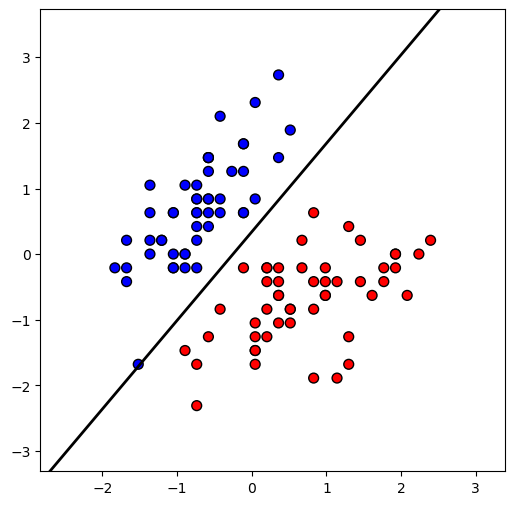

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation

# Cargar el dataset de Iris
data = load_iris()
X = data.data[data.target != 2, :2]  # Usamos solo las dos primeras características y clases 0 y 1
y = data.target[data.target != 2]
y = np.where(y == 0, -1, 1)  # Convertir las etiquetas a -1 y 1 para el perceptrón

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Inicializar los pesos
w = np.zeros(X.shape[1])
b = 0
eta = 0.01  # Tasa de aprendizaje
n_iter = 20  # Aumentamos el número de iteraciones para una animación más suave

# Función para actualizar los pesos en cada iteración
def perceptron_step(X, y, w, b, eta):
    for i, x in enumerate(X):
        if y[i] * (np.dot(x, w) + b) <= 0:
            w += eta * y[i] * x
            b += eta * y[i]
    return w, b

# Configurar la visualización y guardar el cambio del hiperplano
fig, ax = plt.subplots(figsize=(6, 6))  # Aumentamos el tamaño de la figura
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
line, = ax.plot([], [], 'k-', linewidth=2)  # Línea de separación
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolors='k')  # Puntos de datos

# Función de actualización para el video
def animate(i):
    global w, b
    w, b = perceptron_step(X, y, w, b, eta)
    
    # Actualizar el hiperplano (línea de decisión)
    x_vals = np.array([x_min, x_max])
    y_vals = -(w[0] * x_vals + b) / w[1]
    line.set_data(x_vals, y_vals)
    
    # Resaltar los puntos mal clasificados
    predictions = np.sign(np.dot(X, w) + b)
    scatter.set_facecolor(np.where(predictions == y, 'b', 'r'))  # Puntos correctos en azul, incorrectos en rojo
    
    # Devolver ambos elementos para actualizar la animación
    return line, scatter

# Crear y guardar la animación como .gif
ani = FuncAnimation(fig, animate, frames=n_iter, repeat=False, interval=500)  # Aumentamos el intervalo para ver cada paso más claro

# Guardar la animación como GIF
ani.save('perceptron_iris_hyperplane.gif', writer='pillow', fps=2)

# Mostrar la animación
plt.show()


La implementación del Perceptrón en el dataset de Iris permitió observar cómo el modelo ajusta un hiperplano para clasificar correctamente las clases setosa y versicolor, las cuales son linealmente separables. Durante el entrenamiento, el Perceptrón actualiza iterativamente los pesos en función de los errores cometidos en la clasificación de los puntos, ajustando el hiperplano de separación hasta alcanzar una clasificación adecuada. La visualización del proceso de aprendizaje resultó muy útil, ya que permitió observar en tiempo real cómo se desplaza el hiperplano en cada iteración y cómo el modelo se ajusta gradualmente para reducir los errores de clasificación. Asimismo, este ejercicio subrayó la importancia de la tasa de aprendizaje: una tasa alta puede causar oscilaciones y falta de convergencia, mientras que una tasa baja puede hacer que el proceso de aprendizaje sea lento. Esta parte de la tarea facilitó una comprensión clara del funcionamiento básico del Perceptrón en problemas linealmente separables.

**Parte 2: Clasificación de Anillos Concéntricos con Kernel Perceptrón**

En esta segunda parte, implementaremos un perceptrón con kernel para clasificar datos con una distribución de anillos concéntricos. Vamos a usar un kernel polinómico de grado 2 y un kernel RBF (Gaussiano) para transformar los datos y luego evaluaremos el rendimiento de cada uno.

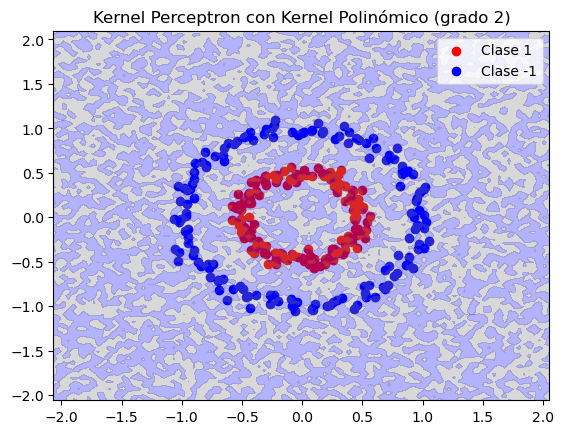

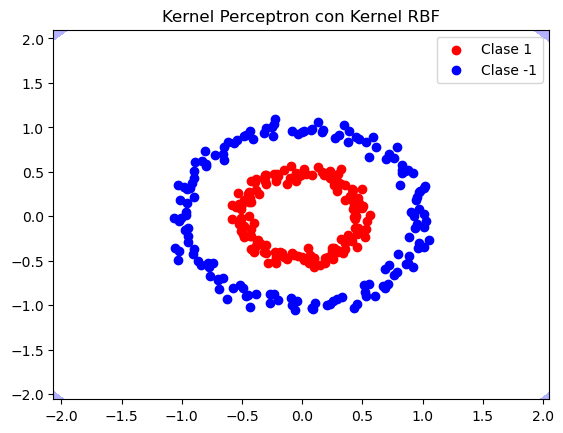

In [6]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generar los datos de anillos concéntricos
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y = np.where(y == 0, -1, 1)

# Definir el kernel polinómico de grado 2
def polynomial_kernel(X, Z, degree=2):
    return (np.dot(X, Z.T) + 1) ** degree

# Definir el kernel RBF
def rbf_kernel(X, Z, gamma=1):
    sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Z**2, axis=1) - 2 * np.dot(X, Z.T)
    return np.exp(-gamma * sq_dists)

# Implementación del Kernel Perceptrón
def kernel_perceptron(X, y, kernel_func, n_iter=10):
    alphas = np.zeros(len(y))
    for _ in range(n_iter):
        for i in range(len(y)):
            if y[i] * np.sum(alphas * y * kernel_func(X, X[i].reshape(1, -1))) <= 0:
                alphas[i] += 1
    return alphas

# Entrenar y obtener alfas para ambos kernels
alphas_poly = kernel_perceptron(X, y, polynomial_kernel)
alphas_rbf = kernel_perceptron(X, y, rbf_kernel)

# Visualizar la frontera de decisión
def plot_decision_boundary(X, y, alphas, kernel_func, title):
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Clase -1')
    
    # Malla para la visualización
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.c_[xx.ravel(), yy.ravel()]
    
    # Predecir y obtener valores de frontera
    decision = np.array([np.sum(alphas * y * kernel_func(X, z.reshape(1, -1))) for z in Z])
    decision = decision.reshape(xx.shape)
    plt.contourf(xx, yy, decision, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'gray', 'red'])
    plt.title(title)
    plt.legend()
    plt.show()

# Visualizar la frontera de decisión para cada kernel
plot_decision_boundary(X, y, alphas_poly, polynomial_kernel, "Kernel Perceptron con Kernel Polinómico (grado 2)")
plot_decision_boundary(X, y, alphas_rbf, rbf_kernel, "Kernel Perceptron con Kernel RBF")


Trabajamos con datos distribuidos en anillos concéntricos, un caso no linealmente separable en el que un Perceptrón lineal no puede clasificar correctamente. Para resolver este problema, implementamos el Kernel Perceptrón con dos tipos de kernels: el kernel polinómico de grado 2 y el kernel Gaussiano (RBF). Al comparar los resultados, se observó que el kernel polinómico logró una separación parcial entre los datos, mientras que el kernel Gaussiano produjo una frontera de decisión mucho más precisa, adaptándose mejor a la forma circular de los datos. Esto demostró la efectividad del kernel RBF en capturar patrones no lineales complejos, resaltando la importancia de elegir un kernel adecuado según la distribución de los datos. Además, observar las instancias asociadas con alfas distintas de cero permitió identificar cuáles puntos son más relevantes para definir la frontera de decisión. Esta parte de la tarea enfatizó cómo los métodos de kernel pueden ampliar significativamente las capacidades del Perceptrón en problemas no lineales.

**Explicación de los Resultados:**

**Parte 1:** El Perceptrón lineal es capaz de separar las clases setosa y versicolor si los datos son linealmente separables. A medida que el modelo se entrena, el hiperplano de separación se ajusta, y podemos visualizar cómo cambia en cada iteración.

**Parte 2:** El Kernel Perceptrón se utiliza cuando los datos no son linealmente separables, como en el caso de los anillos concéntricos. El kernel polinómico de grado 2 y el kernel RBF permiten transformar los datos a un espacio de mayor dimensión donde se pueden separar linealmente. La visualización muestra las fronteras de decisión generadas por cada kernel.

**Conclusiones generales**

Este trabajo mostró cómo el Perceptrón puede ser una herramienta eficiente en problemas linealmente separables, y cómo el uso de kernels permite abordar problemas de clasificación más complejos. La implementación práctica de estos métodos resaltó la importancia de seleccionar y ajustar adecuadamente los hiperparámetros, como la tasa de aprendizaje y el tipo de kernel, ya que tienen un impacto directo en el rendimiento y la precisión del modelo. Las visualizaciones también fueron fundamentales, ya que facilitaron la interpretación del proceso de aprendizaje y las fronteras de decisión en diferentes escenarios de clasificación.